In [2]:
import os 
import numpy as np 
import scipy.stats as ss
import nibabel as nib 
import hcp_utils as hcp 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import nilearn.plotting as nplt
import seaborn as sns 
import seaborn.objects as so 

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [3]:
dir_path = r'/Users/weiwei/BaiduCloud/Work/Paris/HSV/Revised/data'
rgba_mv = np.load(os.path.join(dir_path, 'rgba_mv_rmRS_167.npy'))
import v_model_hsv as vmod 
th_ind_mv, rd_ind_mv, th_grp_mv, rd_grp_mv, color_mv = vmod.v_hsv_model_rgba_indiv(rgba_mv)

In [4]:
dir_cloud = '/Users/weiwei/BaiduCloud'
dir_surf = dir_cloud + '/Work/Paris/HSV/Surfs'
slh = dir_surf + '/S1200.L.inflated_MSMAll.32k_fs_LR.surf.gii'
srh = dir_surf + '/S1200.R.inflated_MSMAll.32k_fs_LR.surf.gii'
lab_l = nib.load(dir_surf + '/fsLR.32k.L.label.gii').agg_data()
lab_r = nib.load(dir_surf + '/fsLR.32k.R.label.gii').agg_data()
labs  = np.concatenate((lab_l, lab_r))
parc   = hcp.mmp.map_all[hcp.struct.cortex]
yeo7   = hcp.yeo7.map_all[hcp.struct.cortex]
from nilearn import surface
slh_inf = surface.load_surf_mesh(slh)
srh_inf = surface.load_surf_mesh(srh)

In [5]:
cls = nib.load('/Users/weiwei/BaiduCloud/Work/Paris/HSV/Revised/data/lh.cls_th_mv_rmRS_LvsR.label.gii').agg_data()
cls.shape

(32492,)

In [6]:
rgba_LR_mv = np.zeros((167,3,32492*2))
rgba_LR_mv[:,:,labs!=0] = rgba_mv[:,:3,:]
rgba_LH = rgba_LR_mv[:,:,:32492]
rgba_RH = rgba_LR_mv[:,:,32492:]

rgba_LH_c1 = rgba_LH[:,:3,cls==1].mean(axis=2)
rgba_LH_c2 = rgba_LH[:,:3,cls==2].mean(axis=2)
rgba_LH_c3 = rgba_LH[:,:3,cls==3].mean(axis=2)
rgba_LH_c4 = rgba_LH[:,:3,cls==4].mean(axis=2)
rgba_LH_c5 = rgba_LH[:,:3,cls==5].mean(axis=2)

rgba_RH_c1 = rgba_RH[:,:3,cls==1].mean(axis=2)
rgba_RH_c2 = rgba_RH[:,:3,cls==2].mean(axis=2)
rgba_RH_c3 = rgba_RH[:,:3,cls==3].mean(axis=2)
rgba_RH_c4 = rgba_RH[:,:3,cls==4].mean(axis=2)
rgba_RH_c5 = rgba_RH[:,:3,cls==5].mean(axis=2)

df = pd.DataFrame({'beta_c1': np.concatenate((rgba_LH_c1[:,0], rgba_LH_c1[:,1], rgba_LH_c1[:,2], rgba_RH_c1[:,0], rgba_RH_c1[:,1], rgba_RH_c1[:,2])),
                   'beta_c2': np.concatenate((rgba_LH_c2[:,0], rgba_LH_c2[:,1], rgba_LH_c2[:,2], rgba_RH_c2[:,0], rgba_RH_c2[:,1], rgba_RH_c2[:,2])),
                   'beta_c3': np.concatenate((rgba_LH_c3[:,0], rgba_LH_c3[:,1], rgba_LH_c3[:,2], rgba_RH_c3[:,0], rgba_RH_c3[:,1], rgba_RH_c3[:,2])),
                   'beta_c4': np.concatenate((rgba_LH_c4[:,0], rgba_LH_c4[:,1], rgba_LH_c4[:,2], rgba_RH_c4[:,0], rgba_RH_c4[:,1], rgba_RH_c4[:,2])),
                   'beta_c5': np.concatenate((rgba_LH_c5[:,0], rgba_LH_c5[:,1], rgba_LH_c5[:,2], rgba_RH_c5[:,0], rgba_RH_c5[:,1], rgba_RH_c5[:,2])),
                    'group':['LH']*167*3 + ['RH']*167*3, 'type':(['V']*167+['S']*167+['A']*167) * 2})

df

,beta_c1,beta_c2,beta_c3,beta_c4,beta_c5,group,type
0,0.050830,0.123622,0.176871,0.119518,0.449962,LH,V
1,0.080068,0.055574,0.408689,0.127505,0.353324,LH,V
2,0.090951,0.036208,0.361405,0.190984,0.280776,LH,V
3,0.320445,0.088229,0.302475,0.138748,0.160582,LH,V
4,0.303640,0.013089,0.560668,0.214820,0.412724,LH,V
...,...,...,...,...,...,...,...
997,0.176848,0.333606,0.234198,0.299260,0.089184,RH,A
998,0.004569,0.197788,0.101381,0.007756,0.016809,RH,A
999,0.090100,0.285313,0.132659,0.340031,0.048735,RH,A
1000,0.096512,0.198294,0.216322,0.241833,0.087828,RH,A


In [7]:
th_grp_LR = np.zeros(32492*2)
th_grp_LR[labs!=0] = th_grp_mv
rd_grp_LR = np.zeros(32492*2)
rd_grp_LR[labs!=0] = rd_grp_mv

/var/folders/_x/zn4_b1h54dn55qg4m99bn_y40000gn/T/ipykernel_15811/1918392700.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[j].set_xticklabels(labels=['V','S','A'], fontdict={'fontsize':6})


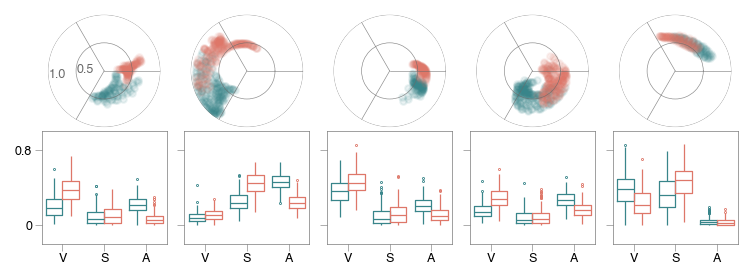

In [13]:
from matplotlib.gridspec import GridSpec
plt.rcParams["font.family"] = "Helvetica"

cm = 1/2.54
fig=plt.figure(figsize=(13*cm, 5*cm), dpi=150, facecolor='white')
gs = GridSpec(2, 5, figure=fig)
axs= [None]*10

axs[0] = fig.add_subplot(gs[0,0], projection='polar')
axs[1] = fig.add_subplot(gs[0,1], projection='polar')
axs[2] = fig.add_subplot(gs[0,2], projection='polar')
axs[3] = fig.add_subplot(gs[0,3], projection='polar')
axs[4] = fig.add_subplot(gs[0,4], projection='polar')

axs[5] = fig.add_subplot(gs[1,0])
axs[6] = fig.add_subplot(gs[1,1])
axs[7] = fig.add_subplot(gs[1,2])
axs[8] = fig.add_subplot(gs[1,3])
axs[9] = fig.add_subplot(gs[1,4])

for i in range(5):
    axs[i].scatter(th_grp_LR[:32492][cls==i+1], rd_grp_LR[:32492][cls==i+1], c='#38858A', alpha=.1, s=10)
    axs[i].scatter(th_grp_LR[32492:][cls==i+1], rd_grp_LR[32492:][cls==i+1], c='#DE7769', alpha=.1, s=10)
    axs[i].set_ylim([0,1])
    axs[i].set_yticks([0.5, 1])
    axs[i].set_xticks([0/360*2*np.pi,120/360*2*np.pi,240/360*2*np.pi])
    if i == 0:
        axs[i].set_xticklabels(labels=['','',''], fontdict={'fontsize':6, "color":'dimgrey'})
        axs[i].set_yticklabels(labels=['0.5', '1.0'], fontdict={'fontsize':6, "color":'dimgrey'})
    else:
        axs[i].set_xticklabels(labels=['','',''])
        axs[i].set_yticklabels(labels=['',''])
    axs[i].set_rlabel_position(190)
    axs[i].tick_params(axis='x', which='major', pad=-4.5)
    axs[i].grid(linewidth=.3, color='dimgrey', alpha=.8)
    axs[i].spines['polar'].set_visible(False)

sns.boxplot(df, x='type', y='beta_c1', hue='group', palette={'LH':'#38858A','RH':'#DE7769'}, showcaps=False, showfliers=True, ax=axs[5], fill=False, legend=False, fliersize=.4, linewidth=.6)
sns.boxplot(df, x='type', y='beta_c2', hue='group', palette={'LH':'#38858A','RH':'#DE7769'}, showcaps=False, showfliers=True, ax=axs[6], fill=False, legend=False, fliersize=.4, linewidth=.6)
sns.boxplot(df, x='type', y='beta_c3', hue='group', palette={'LH':'#38858A','RH':'#DE7769'}, showcaps=False, showfliers=True, ax=axs[7], fill=False, legend=False, fliersize=.4, linewidth=.6)
sns.boxplot(df, x='type', y='beta_c4', hue='group', palette={'LH':'#38858A','RH':'#DE7769'}, showcaps=False, showfliers=True, ax=axs[8], fill=False, legend=False, fliersize=.4, linewidth=.6)
sns.boxplot(df, x='type', y='beta_c5', hue='group', palette={'LH':'#38858A','RH':'#DE7769'}, showcaps=False, showfliers=True, ax=axs[9], fill=False, legend=False, fliersize=.4, linewidth=.6)

for j in range(5,10):
    axs[j].set_xlabel('')
    axs[j].set_ylabel('')
    axs[j].set_xticklabels(labels=['V','S','A'], fontdict={'fontsize':6})
    axs[j].set_ylim([-.2,1])
    axs[j].set_yticks([0,.8])
    if j==5:
        axs[j].set_yticklabels(labels=['0','0.8'], fontdict={'fontsize':6})
    else:
        axs[j].set_yticklabels(labels=['','']) 
    axs[j].tick_params(axis='x', which='major', pad=1, color='grey', width=.3)
    axs[j].tick_params(axis='y', which='major', pad=1, color='grey', width=.3)
    for pos in ['top', 'bottom', 'left', 'right']:
        axs[j].spines[pos].set_linewidth(.3)
        axs[j].spines[pos].set_edgecolor('dimgrey')


plt.tight_layout(w_pad=.5, h_pad=0.2)

In [14]:
fig.savefig('/Users/weiwei/BaiduCloud/Work/Paris/HSV/Revised/figures/plot/f08/betas_final.pdf', transparent=True)

In [8]:
th_lh_c1 = th_grp_LR[:32492][cls==1]
th_lh_c2 = th_grp_LR[:32492][cls==2]
th_lh_c3 = th_grp_LR[:32492][cls==3]
th_lh_c4 = th_grp_LR[:32492][cls==4]
th_lh_c5 = th_grp_LR[:32492][cls==5]
th_rh_c1 = th_grp_LR[32492:][cls==1]
th_rh_c2 = th_grp_LR[32492:][cls==2]
th_rh_c3 = th_grp_LR[32492:][cls==3]
th_rh_c4 = th_grp_LR[32492:][cls==4]
th_rh_c5 = th_grp_LR[32492:][cls==5]

# rd_lh_c1 = rd_grp_LR[:32492][cls==1]
# rd_lh_c2 = rd_grp_LR[:32492][cls==2]
# rd_lh_c3 = rd_grp_LR[:32492][cls==3]
# rd_lh_c4 = rd_grp_LR[:32492][cls==4]
# rd_lh_c5 = rd_grp_LR[:32492][cls==5]
# rd_rh_c1 = rd_grp_LR[32492:][cls==1]
# rd_rh_c2 = rd_grp_LR[32492:][cls==2]
# rd_rh_c3 = rd_grp_LR[32492:][cls==3]
# rd_rh_c4 = rd_grp_LR[32492:][cls==4]
# rd_rh_c5 = rd_grp_LR[32492:][cls==5]

In [10]:
import pycircstat as circ
print(circ.descriptive.mean(th_lh_c1)*360/(2*np.pi), circ.descriptive.mean(th_rh_c1)*360/(2*np.pi))
print(circ.descriptive.mean(th_lh_c2)*360/(2*np.pi), circ.descriptive.mean(th_rh_c2)*360/(2*np.pi))
print(circ.descriptive.mean(th_lh_c3)*360/(2*np.pi), circ.descriptive.mean(th_rh_c3)*360/(2*np.pi))
print(circ.descriptive.mean(th_lh_c4)*360/(2*np.pi), circ.descriptive.mean(th_rh_c4)*360/(2*np.pi))
print(circ.descriptive.mean(th_lh_c5)*360/(2*np.pi), circ.descriptive.mean(th_rh_c5)*360/(2*np.pi))

293.94611928888713 4.5538749496298685
210.46481643576672 140.4701188525226
332.17507390316484 2.8849137140836363
264.9744296130672 336.8480878286461
53.56301246959906 82.61539923209463


In [14]:
display(ss.ttest_rel(rgba_LH_c1, rgba_RH_c1))
display(ss.ttest_rel(rgba_LH_c2, rgba_RH_c2))
display(ss.ttest_rel(rgba_LH_c3, rgba_RH_c3))
display(ss.ttest_rel(rgba_LH_c4, rgba_RH_c4))
display(ss.ttest_rel(rgba_LH_c5, rgba_RH_c5))

TtestResult(statistic=array([-15.92391901,  -1.69261554,  19.14502636]), pvalue=array([2.98544763e-35, 9.24046628e-02, 7.13609887e-44]), df=array([166, 166, 166]))

TtestResult(statistic=array([ -4.49018486, -24.34751981,  29.21733475]), pvalue=array([1.32678763e-05, 1.15462846e-56, 2.49316264e-67]), df=array([166, 166, 166]))

TtestResult(statistic=array([-8.65168075, -4.27622719, 11.6438836 ]), pvalue=array([4.19963696e-15, 3.19931088e-05, 2.75602386e-23]), df=array([166, 166, 166]))

TtestResult(statistic=array([-16.26237405,  -0.4504089 ,  13.8750692 ]), pvalue=array([3.52821416e-36, 6.53003330e-01, 1.47454303e-29]), df=array([166, 166, 166]))

TtestResult(statistic=array([ 10.3801358 , -12.90038729,   2.48780837]), pvalue=array([9.09394343e-20, 8.08853762e-27, 1.38404496e-02]), df=array([166, 166, 166]))